In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import datasets

df = datasets.load_iris()
X = df.data
y = df.target

In [2]:
X.shape

(150, 4)

In [3]:
# X有4个特征，为了方便绘图，我们取2个特征做训练
# 取两个对结果影响最大的特征即可
print(np.corrcoef(X[:, 0],y))
print(np.corrcoef(X[:, 1],y))
print(np.corrcoef(X[:, 2],y))
print(np.corrcoef(X[:, 3],y))


[[1.         0.78256123]
 [0.78256123 1.        ]]
[[ 1.        -0.4194462]
 [-0.4194462  1.       ]]
[[1.         0.94904254]
 [0.94904254 1.        ]]
[[1.         0.95646382]
 [0.95646382 1.        ]]


In [4]:
# 从上面的协方差矩阵来客，特征2和特征3似乎于y更相关，我们选取2和3作为特征，忽略0和1
X = df.data[:, [2,3]]
print(X.shape)
print(y.shape)

(150, 2)
(150,)


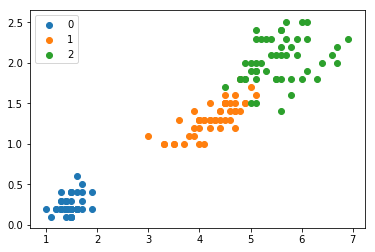

In [5]:
# 把数据画出来
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.scatter(X[y==2, 0], X[y==2, 1], label='2')
plt.legend()
plt.show()

In [13]:
# 我们先关注最简单的二分类问题
# 删掉类别0，只用1和2
X = df.data[: , [2,3]]
y = df.target
X = X[y!=0,:]
y = y[y!=0]
y[y==2] = 0

print(X.shape)
print(y.shape)

(100, 2)
(100,)


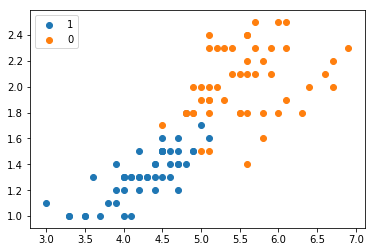

In [7]:
# 把数据画出来
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')
plt.legend()
plt.show()

In [17]:
# 数据终于加载完成，下面进行分类
# 自己实现LR

# 维度说明
# X: m*n
# y: m*1
# theta: n*1


# return m*1
def sigmoid(theta, X):
    return 1./(1 + np.exp(-1 * X.dot(theta)))


def cal_likehood(theta, X, y):
    m = X.shape[0]
    h_theta_x = sigmoid(theta, X)
    cost = y.T.dot(np.log(h_theta_x)) + (1-y).T.dot(np.log(1-h_theta_x))
    return cost/m

def cal_grad(theta, X, y):
    m = X.shape[0]
    h_theta_x = sigmoid(theta, X) # m*1
    r = y - h_theta_x
    grad = X.T.dot(r) 
    return grad/m

def grad_ascent(theta, X, y, num_iter=1000, alpha=0.01):
    for i in range(num_iter):
        grad = cal_grad(theta, X, y)
        theta = theta + alpha*grad
        if i % 100 == 0:
            #print(cal_likehood(theta, X, y))
            pass
        
    return theta


# 用矩阵运算直接求导为0的方法求最优解
def matrix_cal(X, y):
    X_X_T = X.dot(X.T)
    X_T_X = X.T.dot(X)
    theta = np.linalg.pinv(X_T_X).dot(X.T).dot(np.log(np.linalg.pinv(X_X_T).dot(X).dot(X.T).dot(y)) - 1)
    return theta

# 加上x_0
X = df.data[: , [2,3]]
y = df.target
X = X[y!=0,:]
y = y[y!=0]
y[y==2] = 0
m,n = X.shape
X_0 = np.ones((m,1))
X = np.column_stack((X, X_0))
n = n+1
y = y.reshape((-1,1))

theta = np.zeros((n,1))

#print(sigmoid(theta,X))
#print(cal_likehood(theta, X, y))
#print(cal_grad(theta, X, y))

theta = grad_ascent(theta, X, y, num_iter=1000, alpha=0.3)
print(cal_likehood(theta, X, y))
print(theta)
print(cal_grad(theta, X, y))


# 直接矩阵求逆的方法没有得到最优值，
# 估计应该是运算过程中溢出或是精度缺失导致根本无法计算得到有效值了
# theta = matrix_cal(X, y)
# print(cal_likehood(theta, X, y))
# print(theta)

[[-0.24109357]]
[[-0.18045906]
 [-4.89524359]
 [ 8.86346538]]
[[-0.00179095]
 [-0.00448841]
 [ 0.01623701]]


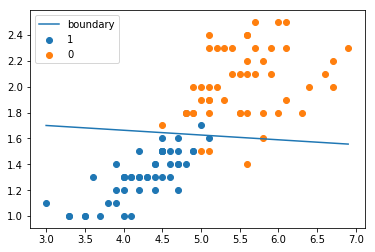

In [18]:
# plot theta
X = df.data[: , [2,3]]
y = df.target
X = X[y!=0,:]
y = y[y!=0]
y[y==2] = 0

plt.figure()
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], label='0')

#绘制分类界限
x = np.linspace(X[:, 0].min(), X[:,0].max(), 20)
y = (-1 * theta[2] - theta[0]*x) / theta[1]

plt.plot(x, y, label='boundary')
plt.legend()

(120, 3)
(120, 1)


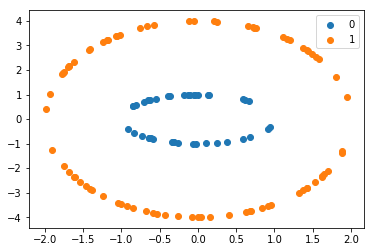

In [43]:
# 构造线性不可分的数据

m = 40

x_1 = np.random.rand(m,1)*2 -1
x_2 = np.sqrt(1-(x_1)**2) * np.sign(np.random.randn(m,1))

plt.scatter(x_1,x_2, label = '0')
y_0 = np.zeros((m,1))

m = 80
x_3 = np.random.rand(m,1)*4 -2 
x_4 = np.sqrt(4-(x_3)**2) * np.sign(np.random.randn(m,1)) * 2

plt.scatter(x_3,x_4, label = '1')
plt.legend()
y_1 = np.ones((m,1))

X_1 = np.row_stack([x_1,x_3])
X_2 = np.row_stack([x_2, x_4])
X = np.column_stack([X_1, X_2])

y = np.row_stack((y_0, y_1))

m = X.shape[0]

X = np.column_stack((X, np.ones((m,1))))

print(X.shape)
print(y.shape)

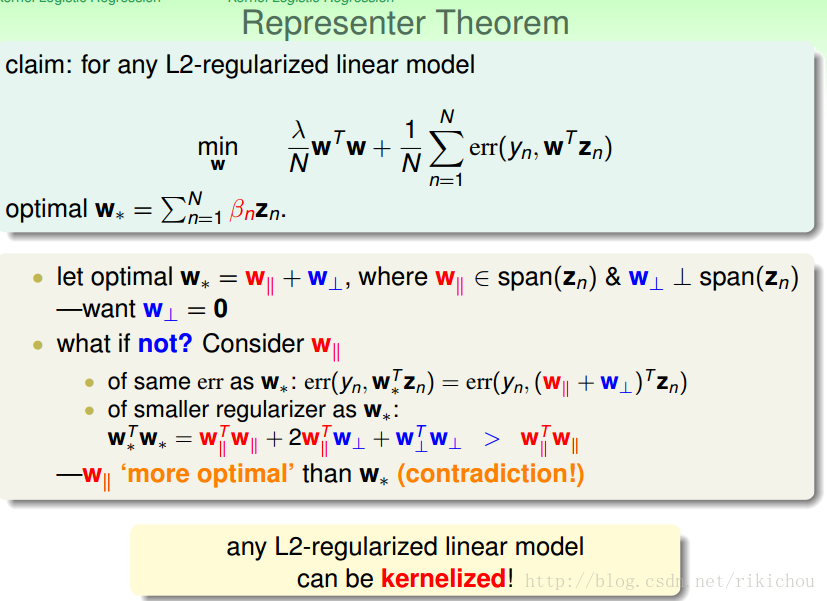

根据上面理论，最优解的参数w必然是数据z的线性组合，我们设beta为这个线性组合的参数
要求最优化的w，即求一组beta使得损失函数最小

In [ ]:
# TODO
#上面的数据是线性不可分的
#需要映射到高维空间

#试着采用核函数的方法映射到高维空间
# 这里采用高斯核函数试试，多项式核函数也可以
# 根据上面理论，最优解的参数w必然是数据z的线性组合，我们设beta为这个线性组合的参数
# 要求最优化的w，即求一组beta使得损失函数最小

#维度：beta: m*1
# X: m*n
# w: n*1
# y: m*1

def cal_cost(beta, X, y):
    w = X.T.dot(beta)
    